In [33]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import names
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas_ml import ConfusionMatrix

In [34]:
males = ['Srekanth','Raghu','Praveen','Ramu','Ali','Hussam','Sai','vinod','kishore']
female = ['sruthi','sphoorthi','swetha','arthi','ranjitha','amulya','preethi','chandana','spandana']

In [35]:
df_male = pd.DataFrame(males,columns=['names'])
df_female = pd.DataFrame(female,columns=['names'])


In [36]:
df_male['Label'] = 0
df_female['Label'] = 1
df = pd.concat((df_male,df_female),axis=0,ignore_index=True)
df.head()

,names,Label
0,Srekanth,0
1,Raghu,0
2,Praveen,0
3,Ramu,0
4,Ali,0


# Features
- Last Letter

In [37]:
m = []
for i in range(len(df['names'])):
    m.append(df['names'][i][-1])

In [38]:
# extracting last letter
def feature_last(name):
    return name[-1]

In [39]:
df['last'] = df['names'].apply(feature_last)
df.head()

,names,Label,last
0,Srekanth,0,h
1,Raghu,0,u
2,Praveen,0,n
3,Ramu,0,u
4,Ali,0,i


In [40]:
# extracting first letter
df['names'].apply(lambda x :x[0].lower())

0     s
1     r
2     p
3     r
4     a
5     h
6     s
7     v
8     k
9     s
10    s
11    s
12    a
13    r
14    a
15    p
16    c
17    s
Name: names, dtype: object

In [41]:
first = lambda x:x[0].lower()

In [42]:
df['first'] = df['names'].apply(first)

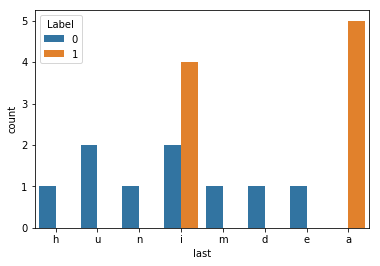

In [43]:
sns.countplot(df['last'],hue=df['Label'])

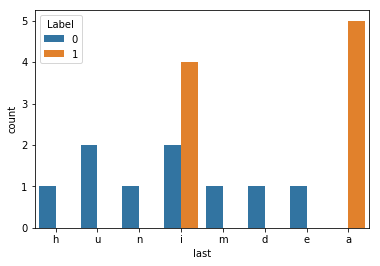

In [44]:
sns.countplot(x='last',data=df,hue='Label')

# creating dummis using one hot encoding

In [13]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
# if we have to apply onoehotencoder first we have to change catagorical data into numiric

In [14]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [15]:
labels = le.fit_transform(df['last'])


In [16]:
le.classes_

array(['a', 'd', 'e', 'h', 'i', 'm', 'n', 'u'], dtype=object)

In [17]:
#onehot = labels.reshape(-1,1).shape # it is a colum matrix
#labels.reshape(1,-1).shape  # it is row matrix

In [18]:
onehot = ohe.fit_transform(labels.reshape(-1,1)).toarray()

/home/praveen/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [19]:
onehot

array([[0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
import pickle
with open('model/labelencoder.pkl','wb') as f: # saving functions wb = bytes
    pickle.dump(le,f)
    
with open('model/onehotencoder.pkl','wb') as f:
    pickle.dump(ohe,f)

In [21]:
ohe.get_feature_names()

array(['x0_0.0', 'x0_1.0', 'x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0',
       'x0_6.0', 'x0_7.0'], dtype=object)

In [22]:
df_dummy = pd.DataFrame(onehot)


In [23]:
df_train = pd.concat((df_dummy,df['Label']),axis=1)

In [24]:
df_train

,0,1,2,3,4,5,6,7,Label
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [25]:
from sklearn.naive_bayes import MultinomialNB # if more then biclasifier

In [26]:
model = MultinomialNB()

In [27]:
x = df_train.iloc[:,:-1].values
y = df_train.iloc[:,-1].values

In [28]:
model.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
# test my model

In [30]:
 def predict_gender(name):
    #name = 'siva'
    f = feature_last(name)
    # convert feature into factor (Labelencoder)

    labelen = le.transform([f])

    # one hot encoder

    test = ohe.transform(labelen.reshape(-1,1)).toarray()
    test
    # pass test to my model
    out = model.predict(test)

    if out == 0 :
        return "Male"
    else:
        return 'Female'

In [31]:
predict_gender('srekanth')

'Male'

In [32]:
name = 'shiva'
f = feature_last(name)
    # convert feature into factor (Labelencoder)

labelen = le.transform([f])
test = ohe.transform(labelen.reshape(-1,1)).toarray()
test


array([[1., 0., 0., 0., 0., 0., 0., 0.]])

# my exp on onehot  

In [47]:
onehot=['last']
data_one=pd.concat((df,pd.get_dummies(df[onehot]).iloc[:,:]),axis=1)
data_one.drop(columns=['names','Label','last','first'],axis = 1,inplace=True)
data_one.head()

,last_a,last_d,last_e,last_h,last_i,last_m,last_n,last_u
0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0


In [48]:
import pickle
with open('model/labelencoder.pkl','wb') as f: # saving functions wb = bytes
    pickle.dump(le,f)
    
with open('model/onehotencoder.pkl','wb') as f:
    pickle.dump(ohe,f)

In [50]:
df_tr = pd.concat((data_one,df['Label']),axis=1)

In [51]:
df_tr.head()

,last_a,last_d,last_e,last_h,last_i,last_m,last_n,last_u,Label
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0


In [52]:
from sklearn.naive_bayes import MultinomialNB # if more then biclasifier

In [53]:
model = MultinomialNB()

In [54]:
x = df_tr.iloc[:,:-1].values
y = df_tr.iloc[:,-1].values

In [55]:
model.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)